In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Prática 1 - Reação de Primeira Ordem

Determinar a constante de velocidade e o tempo de meia vida da decomposição do peróxido de hidrogênio, reação de primeira ordem.

$$\frac{dc}{dt}=-kc$$

Onde o c é concentração do peróxido de hidrogênio, t é o tempo e k é a constante de velocidade.

$$ln c = kt+ ln c_0$$
$$lnV_{KMnO_4}=lnV_0-kt$$

0.0014041336226077237
O tempo de meia vida pela equação é 493.64759122614606


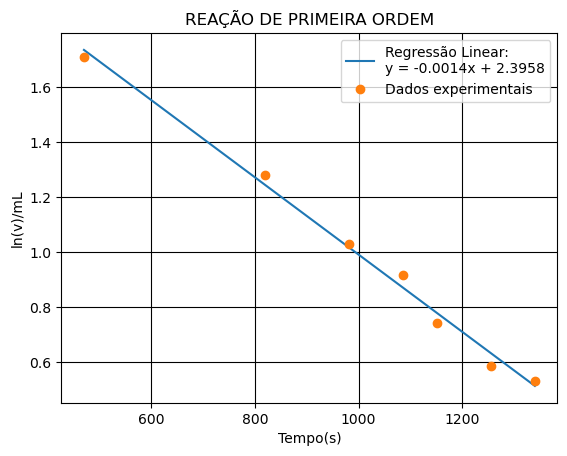

In [49]:

t_s=np.array([470,820,982,1085,1151,1256,1340]) #s
v_cm=np.array([5.52,3.60,2.80,2.50,2.10,1.80,1.70]) #mL
ln_v=np.log(v_cm)

# Regressão linear
coefficients_p1 = np.polyfit(t_s, ln_v, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients_p1)  # Objeto polinomial
ln_v_fit = poly(t_s)  # Valores ajustados
plt.plot(t_s, ln_v_fit, '-', label=f'Regressão Linear: \ny = {coefficients_p1[0]:.4f}x + {coefficients_p1[1]:.4f}')

plt.plot(t_s,ln_v,'o',label='Dados experimentais')
plt.xlabel('Tempo(s)')
plt.ylabel('ln(v)/mL')
plt.title('REAÇÃO DE PRIMEIRA ORDEM')
plt.legend()
plt.grid(True,color='k')

#Definindo a constanta de velocidade k

k=-1*coefficients_p1[0]


#Calculo de meia vida por equação

tm=np.log(2)/k

print ('O tempo de meia vida pela equação é',tm)

plt.savefig('grafico_p1.png', format='png')

## Prática 2 - Determinação dos Parâmetros da Equação de Arrehenius

A constante de velocidade de uma reação química varia com a temperatura de acordo com a equação de Arrenius:
$$k=Ae^{\frac{-Ea}{RT}}~\rightarrow~ ln~k=ln A-\frac{-Ea}{RT}$$

Nesse experimento será estudada, em diferentes temperaturas, a velocidade de reação e redução do persulfato de potássio pelo íon iodeto em meio aquoso. A equação balanceada entre estes íons é a que segue:
$$S_2O_8^{2-}~+~2I^-~ \rightarrow ~ 2SO_4^{2-}~+~I_2$$

[0.0035317  0.00347041 0.00341122 0.00335965 0.0032987  0.00324517]
[0.00032496 0.00048404 0.00056353 0.00097352 0.00136986 0.00165035]
[-8.03179764 -7.63334027 -7.48128237 -6.93459083 -6.59304959 -6.40676763]
48973.9253049069 2.5467900823050074


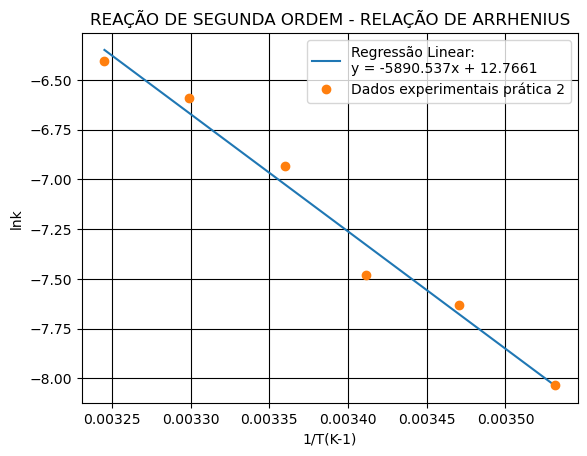

In [59]:
tempo_s=np.array([2133,1432,1230,712,506,420])
temperatura_c=np.array([10,15,20,24.5,30,35])
temperatura_k=temperatura_c+273.15
inverso_temp_k=(1/temperatura_k)
n0=0.2
n=0.1
k1=(1/tempo_s)*np.log(n0/n)
lnk1=np.log(k1)
R=8.314 #J/molK
print(inverso_temp_k)
print(k1)
print(lnk1)

# Regressão linear
coefficients_p2 = np.polyfit(inverso_temp_k,lnk1, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients_p2)  # Objeto polinomial
lnk1_fit = poly(inverso_temp_k)  # Valores ajustados
plt.plot(inverso_temp_k, lnk1_fit, '-', label=f'Regressão Linear: \ny = {coefficients_p2[0]:.3f}x + {coefficients_p2[1]:.4f}')

plt.plot(inverso_temp_k,lnk1,'o',label='Dados experimentais prática 2')
plt.xlabel('1/T(K-1)')
plt.ylabel('lnk')
plt.title('REAÇÃO DE SEGUNDA ORDEM - RELAÇÃO DE ARRHENIUS')
plt.legend()
plt.grid(True,color='k')

#Definindo a constanta de velocidade b

b=-1*coefficients_p2[0]
Ea=b*R #J/mol
A=np.log(coefficients_p2[1])
print (Ea,A)
#b=-Ea/R
plt.savefig('grafico_p2.png', format='png')

## Exercicios avaliativo 2

In [102]:
k1=2.19*10**(-7)#s^{-1}
temp1_c=44
temp1_k=temp1_c+273.15
k2=1.32*10**(-3)#s^{-1}
temp2_c=99.8
temp2_k=temp2_c+273.15
inverso_T=(1/temp2_k)-(1/temp1_k)
Ea=-R*np.log(k2/k1)/inverso_T
print ('Energia de ativação',Ea)
p=1-0.04
temp3_c=75
temp3_k=temp3_c+273.15
lnk3=(Ea/R)*((1/temp1_k)-(1/temp3_k))+np.log(k1)
k3=np.exp(lnk3)
t=np.log(p)/-k3
print ('Tempo para consumir 17%',t)

Energia de ativação 153395.82930284855
Tempo para consumir 17% 1049.0161007417125


## PROVA 1
Q1. A 25°C a meia vida para a decomposição do N2O5 é 2.05 X 10^4 e é independente da concentração inicial de N2O5

-Reação de primeira ordem

### b) 
Qual o intervalo de tempo necessário para que 71,33% do N2O5 se decomponha?
$$ln\frac{[A]}{[A]_0}=-kt$$
$$t_{\frac{1}{2}}=\frac{ln2}{k}$$

In [41]:
c=1-0.7133 #representa consumo de 71,33% de C0
t1=(2.05*10**4)
k=np.log(2)/t1
t2=np.log(c)/-k

print (k,t2)

3.381205758829001e-05 36948.91690133298


## Q.2
$$2NO_(g)~+~2H_2~\rightarrow~ N_2~+~2H_2O_(g)$$

| Experimento | (pH_2)_0/kPa  | p(NO)_0/kPa  | (-dp/dt)/(kPa/s)      |
|-------------|-------|-------|--------|
| 1           | 53.3  | 40.0  | 0.137  |
| 2           | 53.33 | 20.3  | 0.033  |
| 3           | 38.2  | 53.3  | 0.213  |
| 4           | 19.6  | 53.3  | 0.105  |

Com a analise dos dados:
Reação de segunda ordem para NO e primeira ordem para H2.

Gás perfeito encontre a relação entre a velocidade da reação em relaçao a pressão total.

A velocidade é definida como:
$$v=\frac{1}{RT}\cdot\frac{dp}{dt}$$
Se é um gás perfeito e a volume constante, a equação se mantém.

Para encontrar a relação entre dp/dt e a pressão. Inicialmente, a pressão total é P0, a fração molar de NO é x0 e a fração molar de H2 é (1-x0)

$$\frac{dp}{dt}~\alpha~(P_0\cdot x_0)^2\cdot (P_0(1-x_0))$$
$$\frac{dp}{dt}~\alpha~ P_0^3\cdot X_0^2\cdot (1-X_0)$$

## Q3.
$$UO_2(NO_3)_2~\rightarrow~UO_3~+~2NO_2+\frac{1}{2}O_2$$

| t/min | [UO2(NO3)_2]/mol dm^3
|-------------|-------|
| 0           | 0.01413  |
| 20           | 0.01096 |
| 60           | 0.00758  | 
| 180           | 0.00302  |
|360             |0.00055|

Realizando o teste das ordem, determinamos a reação é de primeira ordem, por possuir r próximo a 1, na regresão liner avalia se o modelo inear utilizado é adequad para descrever a relação entre a variável dependete e independete da equação, mais próximo a 1 indica que se adequa.

Por meio da seguinte equação, determinamos a contante de velocidade:

$$ln[A]=ln[A]_0-kt$$

In [81]:
t=np.array([0,20,60,180,360])
c=np.array([0.01413,0.01096,0.00758,0.00302,0.00055])
lnc=np.log(c)
# Regressão linear
coefficients_q3 = np.polyfit(t,lnc, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients_q3)  # Objeto polinomial
lnc_fit = poly(t)  # Valores ajustados

#Definindo a constanta de velocidade k

k_q3=-1*coefficients_q3[0]
print (k_q3)

0.008822031598597001


## Q4.
$$N_2O_5~\rightarrow~4NO_2~+~O_2$$
A constante de velocidade para a reação química tem seu valor duplicado quanto a temperatura de 22,5°C para 27,47°C. Considerando que o fator pré-exponencial é indepente da temperatura, determine a energia de ativação da reação.
$$ln(\frac{k2}{k1})=-\frac{Ea}{R}(\frac{1}{T_2}-\frac{1}{T_1})$$

In [94]:
T1_c=22.50
T1_k=T1_c+273.15
T2_c=27.47
T2_k=T2_c+273.15
R=8.314
termo_T=(1/T1_k)-(1/T2_k)
Ea=-np.log(2)*R/termo_T

print(termo_T,Ea)

5.591915948260223e-05 -103056.37124192354
